## Citations

Rollings, A. (2020). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python, hiive extended remix. https://github.com/hiive/mlrose. Accessed: Sept 28, 2020

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: Sept 28, 2020

(Timer) https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python

Sojal, Tanvir (2018). Computing number of conflicting pairs in N-Queen board in Linear Time and Space Complexity. https://towardsdatascience.com/computing-number-of-conflicting-pairs-in-a-n-queen-board-in-linear-time-and-space-complexity-e9554c0e0645.  Accessed (Oct 5, 2020)

In [12]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit

## N-Queens

In [ ]:
# Define alternative N-Queens fitness function for maximization problem
# Ref: https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
def queens_max(state):

# Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

               # If no attacks, then increment counter
               fitness_cnt += 1

    return fitness_cnt

In [21]:
# Initialize custom fitness function object
fitness = mlrose.CustomFitness(queens_max)
num_Queens = 8

In [22]:
problem = mlrose.DiscreteOpt(num_Queens, fitness_fn = fitness, maximize = True, max_val=num_Queens)
max_iters = 1000
max_attempts = 200

### Randomized Hill Climbing

In [23]:
start = timeit.default_timer()
best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem, max_attempts = max_attempts, max_iters=max_iters, restarts=3, curve=True, init_state = None, random_state=1)
end = timeit.default_timer()

print(f'Best Fitness: {best_fitness}, Wall time: {end-start}s')

Best Fitness: 28.0, Wall time: 0.08151095300013367s


In [38]:
max_iters_list=[50,100,250,500,1000,2000,5000]
max_attempts_list=[100,200,500]
num_Queens_list=[8,10,12,15,18,20]
cols=['ctr','num_queens','max_iters','max_attempts','best_fitness','wall_time']
rows=[]
ctr=0

for max_iters in max_iters_list:
    for max_attempts in max_attempts_list:
        for num_Queens in num_Queens_list:
            ctr = ctr+1
            start = timeit.default_timer()
            problem = mlrose.DiscreteOpt(num_Queens, fitness_fn = fitness, maximize = True, max_val=num_Queens)            
            best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
                                                                           max_iters=max_iters, 
                                                                           restarts=20, curve=True, 
                                                                           init_state = None, random_state=1)
            end = timeit.default_timer()
            wall_time = end-start
            row=[ctr, num_Queens, max_iters, max_attempts, best_fitness, wall_time]
            rows.append(row)
            
            #print(f'Max Iteration: {max_iters}, Max_Attempts: {max_attempts}, Num_Queens: {num_Queens}, Wall time: {end-start}s')
            #print(f'Number of iterations: {len(rhc_curve)}, Best Fitness: {best_fitness}')
            
rhc_df = pd.DataFrame(rows, columns=cols)            

KeyboardInterrupt: 

In [37]:
# fig, ax = plt.subplots(figsize=(8,6))
#for num_Queens in num_Queens_list:
#    ax = rhc_df['num_queens']
#rhc_df.groupby('num_queens').plot(kind='line', x='max_iters', y="best_fitness", ax=ax)
# plt.show()

### Simulated Annealing

In [18]:
start = timeit.default_timer()
schedule = mlrose.ArithDecay(init_temp=100, decay=0.95, min_temp=1)
best_state, best_fitness, sa_curve = mlrose.simulated_annealing(problem=problem, 
                                                                schedule=schedule,
                                                                max_attempts=100, 
                                                                max_iters=max_iters, 
                                                                curve=True, 
                                                                random_state=None)
end = timeit.default_timer()

print(f'Best Fitness: {best_fitness}, Wall time: {end-start}s')

Best Fitness: 181.0, Wall time: 2.493344658000069s


### Genetic Algorithm

In [15]:
start = timeit.default_timer()
best_state, best_fitness, ga_curve = mlrose.genetic_alg(problem=problem, pop_size=200, mutation_prob=0.3, max_attempts=100, max_iters=max_iters, curve=True, random_state=None)
end = timeit.default_timer()

print(f'Best Fitness: {best_fitness}, Wall time: {end-start}s')

Best Fitness: 189.0, Wall time: 16.914268025999945s


### MIMIC

In [17]:
start = timeit.default_timer()
best_state, best_fitness, mimic_curve = mlrose.mimic(problem, pop_size = 300, keep_pct = 0.2, max_attempts = max_attempts, 
                                                     max_iters = max_iters,  curve = True, random_state = 1)
end = timeit.default_timer()

print(f'Best Fitness: {best_fitness}, Wall time: {end-start}s')

Best Fitness: 183.0, Wall time: 190.01448240399998s


## Diagrams

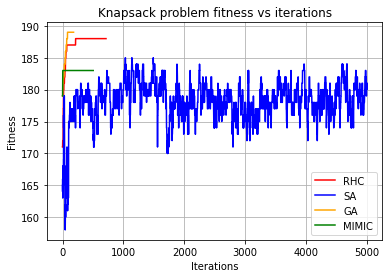

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Knapsack problem fitness vs iterations")
ax.plot(rhc_curve, label='RHC', color='r')
ax.plot(sa_curve, label='SA', color='b')
ax.plot(ga_curve, label='GA', color='orange')
ax.plot(mimic_curve, label='MIMIC', color='g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.grid(True)
ax.legend()